<a href="https://colab.research.google.com/github/joaowinderfeldbussolotto/API-logistica/blob/main/tcc_evaluation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p data
!cp -r /content/drive/My\ Drive/tcc/resultados/validados/deepeval/* data/


In [ ]:
import os

def get_evaluations(base_dir, ppc):
    most_recent_files = {}

    for folder in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder)

        if os.path.isdir(folder_path):
            most_recent_file = None
            most_recent_time = None

            for file_name in os.listdir(folder_path):
                if f"ppc{ppc}" in file_name:
                    file_path = os.path.join(folder_path, file_name)
                    file_time = os.path.getmtime(file_path)

                    if most_recent_time is None or file_time > most_recent_time:
                        most_recent_file = file_path
                        most_recent_time = file_time

            if most_recent_file:
                most_recent_files[folder] = most_recent_file

    return most_recent_files






In [ ]:
base_directory = 'data/'
ppc_value = '2024'

most_recent_eval_files = get_evaluations(base_directory, ppc_value)

for folder, file_path in most_recent_eval_files.items():
    print(f"Modelo: {folder}, {ppc_value} : {file_path}")

Modelo: llama-3.2-90b-text-preview_, 2024 : data/llama-3.2-90b-text-preview_/Groq_QA_ppc2024_08_10_2024_10-40-55.json
Modelo: llama-3.1-70b-versatile_, 2024 : data/llama-3.1-70b-versatile_/llama-3.1-70b-versatile_a6b799QA_ppc2024_08_10_2024_10-40-55.json
Modelo: mistral-large-latest_, 2024 : data/mistral-large-latest_/MixtralLarge_QA_ppc2024_08_10_2024_10-40-55.json


In [ ]:
import pandas as pd

In [ ]:
def load_files_to_dataframes(files_dict):
    """
    Carrega os arquivos JSON mais recentes em dataframes Pandas e retorna um dicionário
    onde a chave é o nome da pasta (LLM) e o valor é o dataframe.
    """
    dataframes = {}

    for folder, file_path in files_dict.items():
        try:
            # Carrega o arquivo JSON em um dataframe
            df = pd.read_json(file_path)
            dataframes[folder] = df
        except ValueError as e:
            print(f"Erro ao carregar o arquivo {file_path}: {e}")
            continue

    return dataframes



dataframes_per_folder = load_files_to_dataframes(most_recent_eval_files)

for folder, df in dataframes_per_folder.items():
    print(f"Dataframe da pasta (LLM) {folder}:")
    display(df.head())

Dataframe da pasta (LLM) llama-3.2-90b-text-preview_:


,input,success,conversational,multimodal,actual_output,expected_output,context,retrieval_context,metrics
0,Qual é a ementa de Introdução à Computação?,True,False,False,A ementa do componente curricular Introdução à...,Introdução ao Curso de Ciência da Computação e...,NaN,[\n\n| Código | COMPONENTE CURRICULAR | Crédit...,"[{'name': 'Correctness (GEval)', 'threshold': ..."
1,Qual é a ementa de Introdução ao Desenvolvimen...,True,False,False,"A ementa de Introdução ao Desenvolvimento Web,...","Introdução à Web: histórico, estrutura e funci...",NaN,[\n\n| Código | COMPONENTE CURRICULAR | Crédit...,"[{'name': 'Correctness (GEval)', 'threshold': ..."
2,Qual é a ementa de Matemática C?,True,False,False,"A ementa de Matemática C, conforme o Plano Ped...",Grandezas proporcionais. Noções de geometria. ...,NaN,[\n\n| Código | COMPONENTE CURRICULAR | Crédit...,"[{'name': 'Correctness (GEval)', 'threshold': ..."
3,Qual é a ementa de Introdução à Filosofia?,True,False,False,"A ementa de Introdução à Filosofia é: ""A natur...",A natureza e especificidade do discurso filosó...,NaN,[\n\n| Código | COMPONENTE CURRICULAR | Crédit...,"[{'name': 'Correctness (GEval)', 'threshold': ..."
4,Qual é a ementa de Algoritmos e Programação?,True,False,False,A ementa do componente curricular Algoritmos e...,Conceito e construção de algoritmos. Tipos bás...,NaN,[\n\n| Código | COMPONENTE CURRICULAR | Crédit...,"[{'name': 'Correctness (GEval)', 'threshold': ..."


Dataframe da pasta (LLM) llama-3.1-70b-versatile_:


,input,success,actual_output,expected_output,context,retrieval_context,metrics
0,Qual é a ementa de Introdução à Computação?,True,A ementa do componente curricular Introdução à...,Introdução ao Curso de Ciência da Computação e...,NaN,[\n\n| Código | COMPONENTE CURRICULAR | Crédit...,"[{'name': 'Correctness (GEval)', 'threshold': ..."
1,Qual é a ementa de Introdução ao Desenvolvimen...,True,"A ementa de Introdução ao Desenvolvimento Web,...","Introdução à Web: histórico, estrutura e funci...",NaN,[\n\n| Código | COMPONENTE CURRICULAR | Crédit...,"[{'name': 'Correctness (GEval)', 'threshold': ..."
2,Qual é a ementa de Matemática C?,True,"A ementa de Matemática C, conforme o Plano Ped...",Grandezas proporcionais. Noções de geometria. ...,NaN,[\n\n| Código | COMPONENTE CURRICULAR | Crédit...,"[{'name': 'Correctness (GEval)', 'threshold': ..."
3,Qual é a ementa de Introdução à Filosofia?,True,"A ementa de Introdução à Filosofia é: ""A natur...",A natureza e especificidade do discurso filosó...,NaN,[\n\n| Código | COMPONENTE CURRICULAR | Crédit...,"[{'name': 'Correctness (GEval)', 'threshold': ..."
4,Qual é a ementa de Algoritmos e Programação?,True,A ementa do componente curricular Algoritmos e...,Conceito e construção de algoritmos. Tipos bás...,NaN,[\n\n| Código | COMPONENTE CURRICULAR | Crédit...,"[{'name': 'Correctness (GEval)', 'threshold': ..."


Dataframe da pasta (LLM) mistral-large-latest_:


,input,success,actual_output,expected_output,context,retrieval_context,metrics
0,Qual é a ementa de Introdução à Computação?,True,A ementa do componente curricular Introdução à...,Introdução ao Curso de Ciência da Computação e...,NaN,[\n\n| Código | COMPONENTE CURRICULAR | Crédit...,"[{'name': 'Correctness (GEval)', 'threshold': ..."
1,Qual é a ementa de Introdução ao Desenvolvimen...,True,"A ementa de Introdução ao Desenvolvimento Web,...","Introdução à Web: histórico, estrutura e funci...",NaN,[\n\n| Código | COMPONENTE CURRICULAR | Crédit...,"[{'name': 'Correctness (GEval)', 'threshold': ..."
2,Qual é a ementa de Matemática C?,True,"A ementa de Matemática C, conforme o Plano Ped...",Grandezas proporcionais. Noções de geometria. ...,NaN,[\n\n| Código | COMPONENTE CURRICULAR | Crédit...,"[{'name': 'Correctness (GEval)', 'threshold': ..."
3,Qual é a ementa de Introdução à Filosofia?,True,"A ementa de Introdução à Filosofia é: ""A natur...",A natureza e especificidade do discurso filosó...,NaN,[\n\n| Código | COMPONENTE CURRICULAR | Crédit...,"[{'name': 'Correctness (GEval)', 'threshold': ..."
4,Qual é a ementa de Algoritmos e Programação?,True,A ementa do componente curricular Algoritmos e...,Conceito e construção de algoritmos. Tipos bás...,NaN,[\n\n| Código | COMPONENTE CURRICULAR | Crédit...,"[{'name': 'Correctness (GEval)', 'threshold': ..."


In [ ]:
dataframes_per_folder.keys()

dict_keys(['llama-3.2-90b-text-preview_', 'llama-3.1-70b-versatile_', 'mistral-large-latest_'])

In [ ]:
dataframes_per_folder.get('llama-3.2-90b-text-preview_').columns

Index(['input', 'success', 'conversational', 'multimodal', 'actual_output',
       'expected_output', 'context', 'retrieval_context', 'metrics'],
      dtype='object')

In [ ]:
# Atualizando as funções para remover o último "_" do nome do modelo

# Função para extrair as métricas do dataframe
def extract_metrics(df):
    metrics_data = []
    for _, row in df.iterrows():
        for metric in row['metrics']:
            metrics_data.append({
                'metric_name': metric['name'],
                'score': metric['score'],
                'success': metric['success']  # Sucesso específico da métrica
            })
    return pd.DataFrame(metrics_data)

# Função para remover o último "_" do nome do modelo
def clean_model_name(model_name):
    if model_name.endswith('_'):
        return model_name[:-1]
    return model_name




# Função para gerar o gráfico de sucessos e falhas (uma linha com 3 gráficos)
def plot_success_failure(dataframes_per_folder):
    fig, axes = plt.subplots(1, len(dataframes_per_folder), figsize=(20, 5), constrained_layout=True)

    for idx, (model_name, df) in enumerate(dataframes_per_folder.items()):
        evaluation_model = clean_model_name(model_name)  # Remover o último "_" do nome do modelo
        total_items = len(df)  # Total de itens é o len do df original

        # Extrair as métricas do dataframe
        df_metrics = extract_metrics(df)

        # Gráfico de sucessos e falhas por métrica
        success_rate = df_metrics.groupby('metric_name')['success'].value_counts().unstack(fill_value=0)
        success_rate_totals = success_rate.sum(axis=1)

        # Plotando o gráfico de sucesso/falha no eixo `ax`
        success_rate.plot(kind='barh', stacked=True, ax=axes[idx], color=['lightcoral', 'lightgreen'])
        axes[idx].set_xlabel('Count')
        axes[idx].set_ylabel('Metric Name')
        axes[idx].set_title(f'Success and Failure ({evaluation_model})')

        # Adicionando rótulos para sucessos com porcentagens e contagens
        for i, (metric, success) in enumerate(success_rate.iterrows()):
            total = success_rate_totals[i]
            axes[idx].text(success[True] - 3, i, f'{int(success[True])} ({(success[True] / total) * 100:.1f}%)', va='center')

    plt.show()

# Função para gerar o gráfico de médias (uma linha com 3 gráficos)
def plot_average_scores(dataframes_per_folder):
    fig, axes = plt.subplots(1, len(dataframes_per_folder), figsize=(20, 5), constrained_layout=True)

    for idx, (model_name, df) in enumerate(dataframes_per_folder.items()):
        evaluation_model = clean_model_name(model_name)  # Remover o último "_" do nome do modelo
        total_items = len(df)  # Total de itens é o len do df original

        # Extrair as métricas do dataframe
        df_metrics = extract_metrics(df)

        # Gráfico de média das métricas
        avg_scores = df_metrics.groupby('metric_name')['score'].mean()

        # Plotando o gráfico de média das métricas no eixo `ax`
        bars = axes[idx].barh(avg_scores.index, avg_scores.values, color='lightblue')
        axes[idx].set_xlabel('Average Score')
        axes[idx].set_ylabel('Metric Name')
        axes[idx].set_title(f'Average Score ({evaluation_model})')

        # Adicionando rótulos
        for bar in bars:
            width = bar.get_width()
            axes[idx].text(width - 0.1, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

    plt.show()

# Função para gerar o gráfico de distribuição (uma linha com 3 gráficos)
def plot_score_distribution(dataframes_per_folder):
    fig, axes = plt.subplots(1, len(dataframes_per_folder), figsize=(20, 5), constrained_layout=True)

    for idx, (model_name, df) in enumerate(dataframes_per_folder.items()):
        evaluation_model = clean_model_name(model_name)  # Remover o último "_" do nome do modelo
        total_items = len(df)  # Total de itens é o len do df original

        # Extrair as métricas do dataframe
        df_metrics = extract_metrics(df)

        # Plotando a distribuição de pontuações no eixo `ax`
        df_metrics['score'].plot(kind='hist', bins=10, ax=axes[idx], color='lightgreen', edgecolor='black')
        axes[idx].set_xlabel('Score')
        axes[idx].set_ylabel('Frequency')
        axes[idx].set_title(f'Score Distribution ({evaluation_model})')

    plt.show()


<ipython-input-48-805dc18c9f08>:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = success_rate_totals[i]
<ipython-input-48-805dc18c9f08>:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = success_rate_totals[i]
<ipython-input-48-805dc18c9f08>:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = success_rate_totals[i]


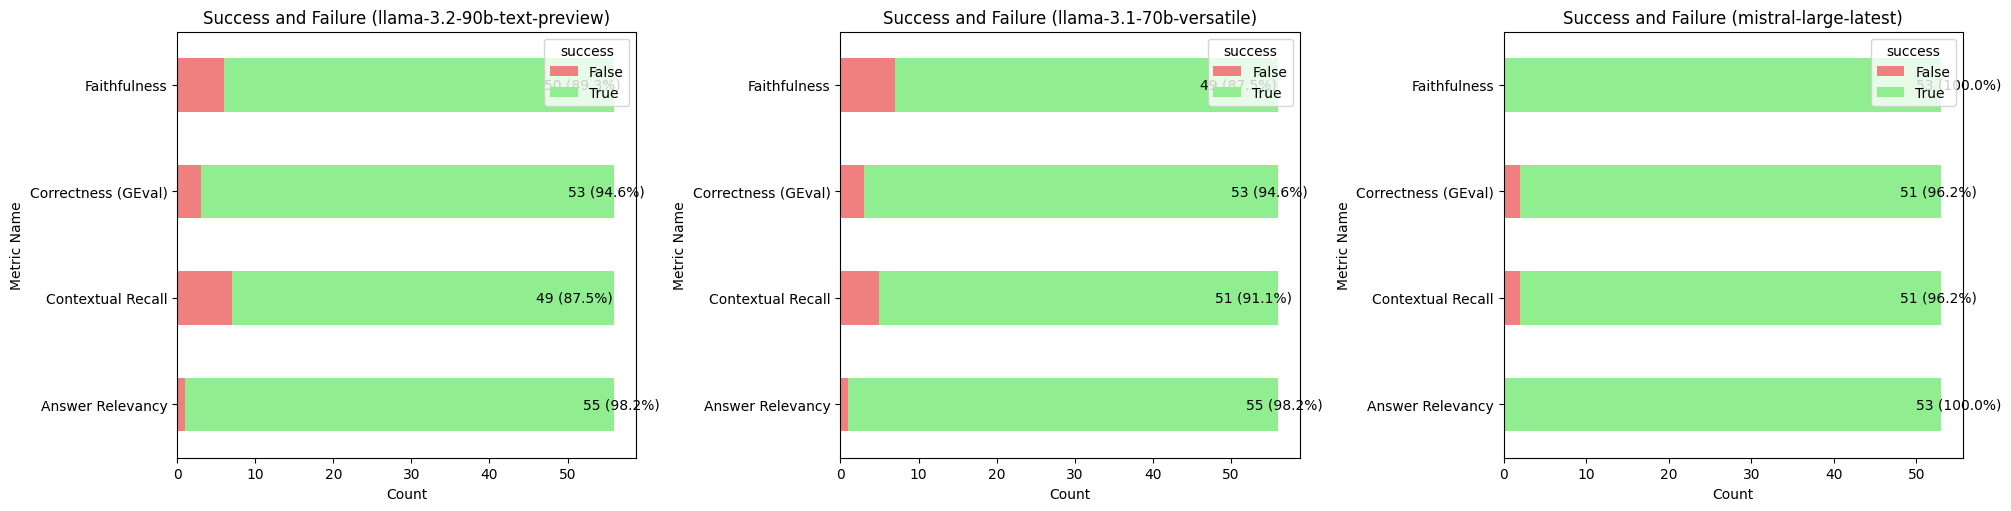

In [ ]:
plot_success_failure(dataframes_per_folder)


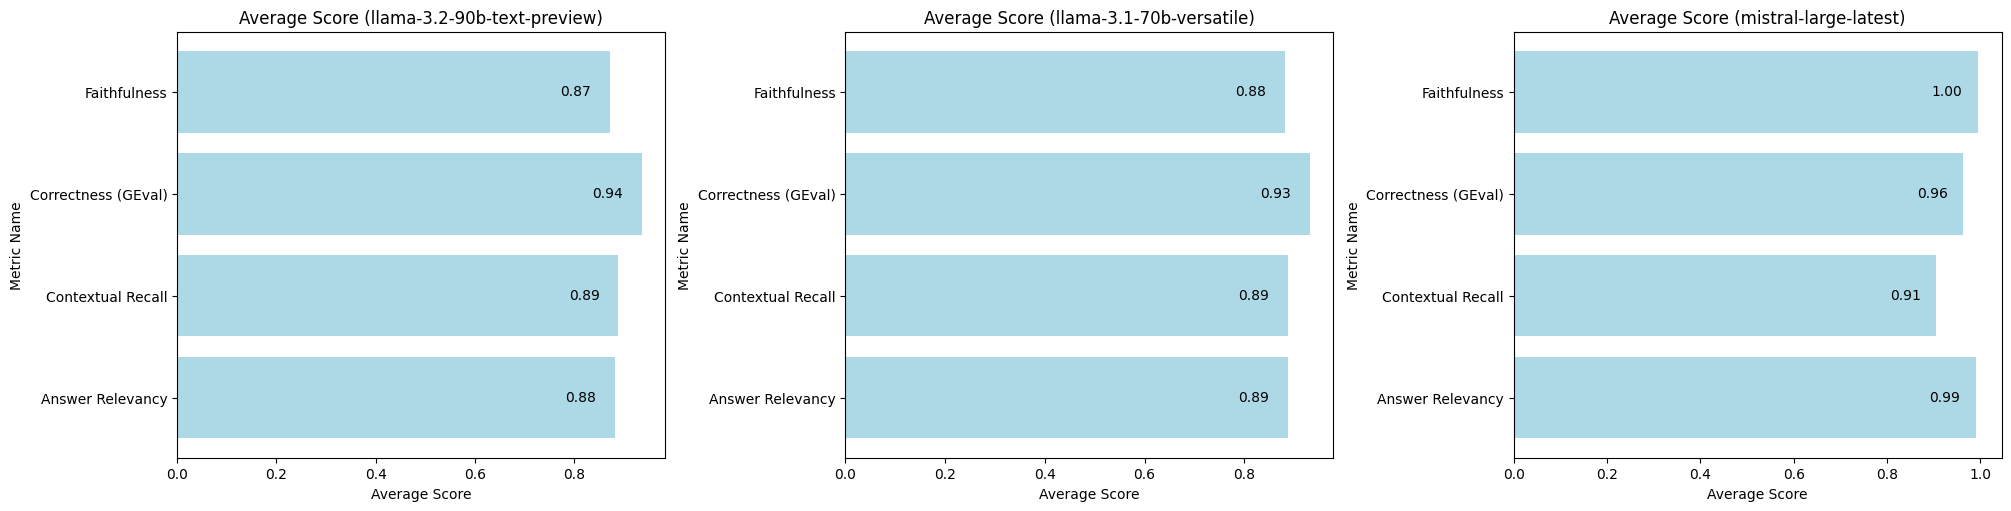

In [ ]:
plot_average_scores(dataframes_per_folder)


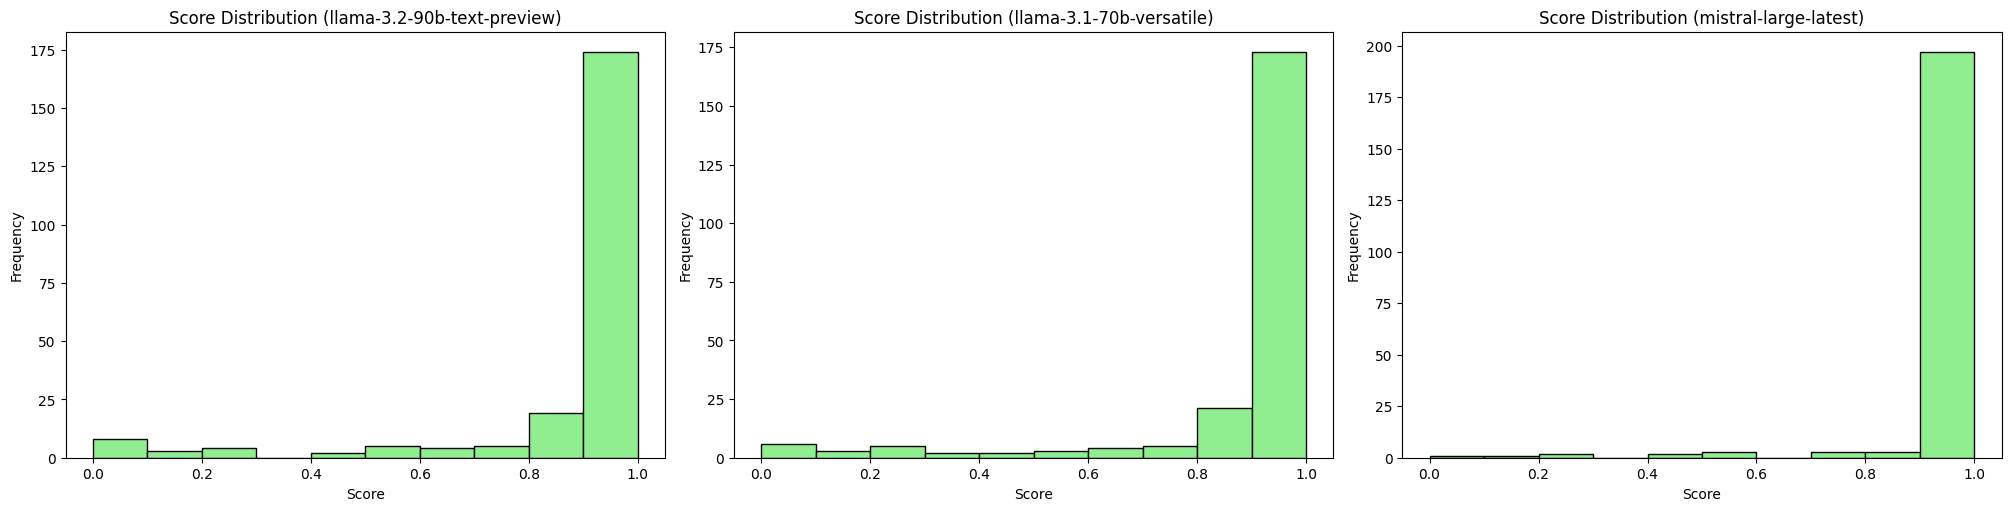

In [ ]:
plot_score_distribution(dataframes_per_folder)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Função para extrair as métricas do dataframe
def extract_metrics(df, model_name):
    metrics_data = []
    for _, row in df.iterrows():
        for metric in row['metrics']:
            metrics_data.append({
                'metric_name': metric['name'],
                'score': metric['score'],
                'model': model_name
            })
    return pd.DataFrame(metrics_data)

# Função para gerar gráfico de comparação de métricas entre os modelos
def plot_metric_comparison(dataframes_per_folder):
    # Lista para armazenar os dataframes de cada modelo
    all_metrics = []

    # Extrair as métricas de cada modelo
    for model_name, df in dataframes_per_folder.items():
        df_metrics = extract_metrics(df, clean_model_name(model_name))
        all_metrics.append(df_metrics)

    # Concatenar os dados de todos os modelos
    all_metrics_df = pd.concat(all_metrics)

    # Pivotar os dados para preparar para o gráfico
    pivot_df = all_metrics_df.pivot_table(values='score', index='metric_name', columns='model')

    # Plotando o gráfico de barras agrupadas
    pivot_df.plot(kind='bar', figsize=(10, 6), color=['#FF8C00', '#FF4500', '#FF1493'])  # Cores personalizadas
    plt.title('Comparação das Métricas entre Modelos de Resposta Automática')
    plt.xlabel('Métrica')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(title='Modelos')
    plt.tight_layout()

    plt.show()




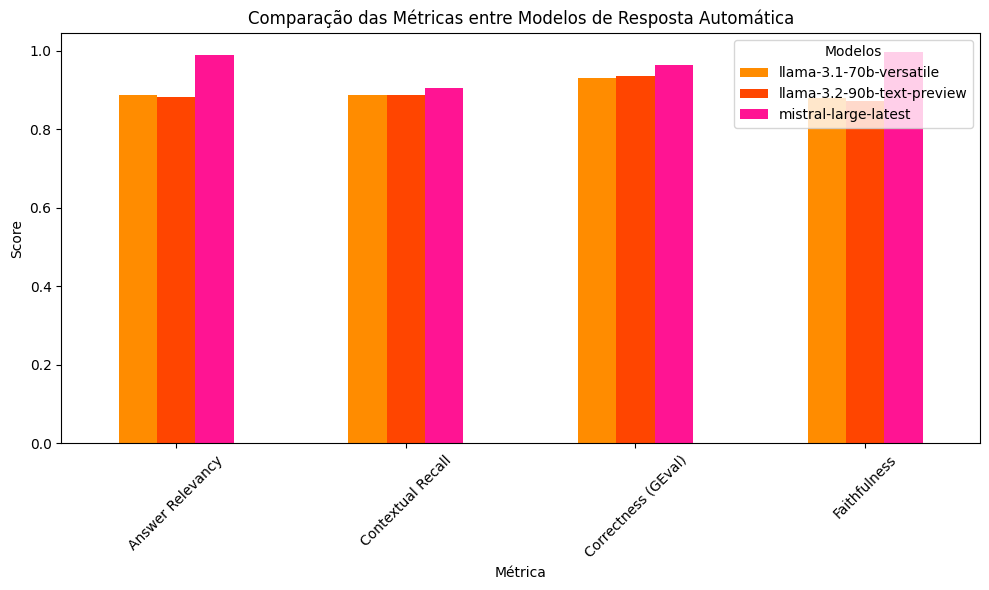

In [ ]:
# Chamando a função para gerar o gráfico de comparação
plot_metric_comparison(dataframes_per_folder)

In [ ]:
# Função para gerar o gráfico de sucessos com barras invertidas e labels (com título significativo)
def plot_success_comparison_true_inverted_with_title(dataframes_per_folder):
    success_data = []

    # Contar o número de sucessos para cada modelo
    for model_name, df in dataframes_per_folder.items():
        true_count = df['success'].value_counts().get(True, 0)  # Obter contagem de sucessos (True)
        total_count = len(df)  # Total de inputs avaliados
        percentage = (true_count / total_count) * 100  # Calcular porcentagem de sucessos
        success_data.append({'model': clean_model_name(model_name), 'success_count': true_count, 'percentage': percentage})

    # Converter em DataFrame
    success_df = pd.DataFrame(success_data)

    # Plotar o gráfico de barras invertido
    success_df.plot(kind='barh', x='model', y='success_count', color='#4E79A7', legend=False, figsize=(8, 5))
    plt.title('Distribuição de Sucessos Gerais (Success = True) por Modelo')
    plt.xlabel('Número de Sucessos')
    plt.ylabel('Modelo')

    # Adicionar labels e porcentagem nas barras
    for index, row in success_df.iterrows():
        plt.text(row['success_count'] + 0.5, index, f"{row['success_count']} ({row['percentage']:.1f}%)", va='center')

    plt.tight_layout()
    plt.show()


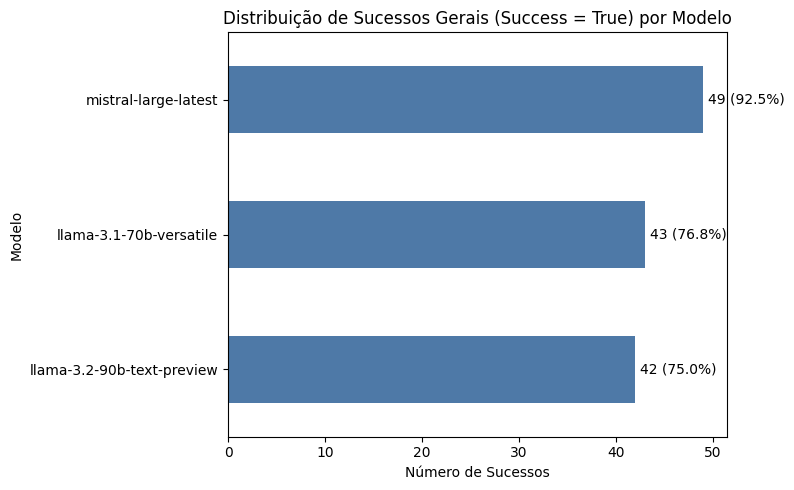

In [ ]:
plot_success_comparison_true_inverted_with_title(dataframes_per_folder)

In [ ]:
# Função para unificar inputs falhos, adicionar 'actual_output', 'expected_output', e as métricas onde falharam
def combine_failed_inputs_with_better_names_and_metrics(dataframes_per_folder):
    combined_failures_list = []

    # Para cada modelo, extrair os inputs com falha
    for model_name, df in dataframes_per_folder.items():
        for index, row in df.iterrows():
            # Coletar as métricas que falharam (success == False)
            for metric in row['metrics']:
                if not metric['success']:
                    # Adicionar cada métrica de falha como uma linha separada
                    combined_failures_list.append({
                        'input': row['input'],
                        'actual_output': row['actual_output'],
                        'expected_output': row['expected_output'],
                        'failed_metric': metric['name'],  # Listar uma métrica por vez
                        'model': clean_model_name(model_name)
                    })

    # Converter a lista de falhas em um DataFrame
    combined_failures = pd.DataFrame(combined_failures_list)

    # Unificar os modelos falhos em um único campo "Modelos Avaliaram Como Errado", mas não agrupar por `failed_metric`
    combined_failures = combined_failures.groupby(['input', 'actual_output', 'expected_output', 'failed_metric']) \
                                         .agg({'model': lambda x: ', '.join(x)}).reset_index()

    # Criar coluna adicional para contar quantos modelos avaliaram como errado
    combined_failures['Numero de Modelos que Falharam'] = combined_failures['model'].apply(lambda x: len(x.split(', ')))

    # Renomear a coluna 'model' para 'Modelos Avaliaram Como Errado'
    combined_failures = combined_failures.rename(columns={'model': 'Modelos Avaliaram Como Errado'})

    # Ordenar pela quantidade de modelos que falharam
    combined_failures = combined_failures[['input', 'Modelos Avaliaram Como Errado', 'actual_output', 'expected_output', 'failed_metric', 'Numero de Modelos que Falharam']]
    combined_failures = combined_failures.sort_values(by='Numero de Modelos que Falharam', ascending=False)

    return combined_failures



,input,Modelos Avaliaram Como Errado,actual_output,expected_output,failed_metric,Numero de Modelos que Falharam
24,Quantas horas de estágio são obrigatórias no c...,"llama-3.2-90b-text-preview, llama-3.1-70b-vers...","A resposta para a pergunta ""Quantas horas de e...","O documento não menciona estágio obrigatório, ...",Correctness (GEval),3
21,Qual é a ementa de Trabalho de Conclusão de Cu...,"llama-3.2-90b-text-preview, llama-3.1-70b-vers...","A ementa do componente curricular ""Trabalho de...",Iniciação à Metodologia da Pesquisa. Aspectos ...,Correctness (GEval),3
1,Há possibilidade de realizar disciplinas EAD?,"llama-3.2-90b-text-preview, llama-3.1-70b-vers...","A resposta para a pergunta ""Há possibilidade d...","Sim, há a possibilidade de realizar disciplina...",Contextual Recall,3
14,Qual é a ementa de Organização de Computadores?,"llama-3.2-90b-text-preview, llama-3.1-70b-vers...","A ementa do componente curricular ""Organização...","Tendências tecnológicas de CPUs, memórias e ba...",Contextual Recall,2
23,Quantas horas de estágio são obrigatórias no c...,"llama-3.2-90b-text-preview, llama-3.1-70b-vers...","A resposta para a pergunta ""Quantas horas de e...","O documento não menciona estágio obrigatório, ...",Contextual Recall,2


In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [ ]:
# Função para unificar inputs falhos, adicionar 'actual_output', 'expected_output', e as métricas onde falharam
def combine_failed_inputs_with_better_names_and_aggregated_metrics(dataframes_per_folder):
    combined_failures_list = []

    # Para cada modelo, extrair os inputs com falha
    for model_name, df in dataframes_per_folder.items():
        for index, row in df.iterrows():
            # Coletar as métricas que falharam (success == False)
            failed_metrics = [metric['name'] for metric in row['metrics'] if not metric['success']]

            # Se houver falhas, adicionar à lista
            if failed_metrics:
                combined_failures_list.append({
                    'input': row['input'],
                    'actual_output': row['actual_output'],
                    'expected_output': row['expected_output'],
                    'failed_metrics': ', '.join(failed_metrics),  # Junta todas as métricas que falharam
                    'model': clean_model_name(model_name)
                })

    # Converter a lista de falhas em um DataFrame
    combined_failures = pd.DataFrame(combined_failures_list)

    # Agrupar por `input`, `actual_output`, e `expected_output`, e agregar as métricas e os modelos
    combined_failures = combined_failures.groupby(['input', 'actual_output', 'expected_output']) \
                                         .agg({
                                             'failed_metrics': lambda x: ', '.join(x.unique()),  # Agregar as métricas falhadas
                                             'model': lambda x: ', '.join(x.unique())  # Agregar os modelos que falharam
                                         }).reset_index()

    # Criar coluna adicional para contar quantos modelos avaliaram como errado
    combined_failures['Numero de Modelos que Falharam'] = combined_failures['model'].apply(lambda x: len(x.split(', ')))

    # Renomear a coluna 'model' para 'Modelos Avaliaram Como Errado'
    combined_failures = combined_failures.rename(columns={'model': 'Modelos Avaliaram Como Errado'})

    # Ordenar pela quantidade de modelos que falharam
    combined_failures = combined_failures[['input', 'Modelos Avaliaram Como Errado', 'actual_output', 'expected_output', 'failed_metrics', 'Numero de Modelos que Falharam']]
    combined_failures = combined_failures.sort_values(by='Numero de Modelos que Falharam', ascending=False)

    return combined_failures

# Gerar a tabela combinada de inputs com falhas, ordenada e com as métricas agregadas onde falharam
failed_inputs_combined_with_metrics = combine_failed_inputs_with_better_names_and_aggregated_metrics(dataframes_per_folder)
failed_inputs_combined_with_metrics # Exibir as primeiras linhas da tabela


,input,Modelos Avaliaram Como Errado,actual_output,expected_output,failed_metrics,Numero de Modelos que Falharam
19,Quantas horas de estágio são obrigatórias no curso?,"llama-3.2-90b-text-preview, llama-3.1-70b-versatile, mistral-large-latest","A resposta para a pergunta ""Quantas horas de estágio são obrigatórias no curso?"" não foi encontrada no trecho fornecido do Plano Pedagógico do Curso (PPC) de Ciência da Computação da UFFS. O PPC fornece informações detalhadas sobre os componentes curriculares, carga horária, ementas, objetivos, referências bibliográficas, entre outros, mas não especifica o número de horas de estágio obrigatórias no curso.","O documento não menciona estágio obrigatório, logo, pode-se concluir que não há estágio obrigatório para concluir o curso","Correctness (GEval), Answer Relevancy, Contextual Recall, Correctness (GEval), Contextual Recall, Correctness (GEval)",3
18,Qual é a ementa de Trabalho de Conclusão de Curso I?,"llama-3.2-90b-text-preview, llama-3.1-70b-versatile, mistral-large-latest","A ementa do componente curricular ""Trabalho de Conclusão de Curso I"" não está especificada diretamente no trecho fornecido do Plano Pedagógico do Curso (PPC) de Ciência da Computação da UFFS. No entanto, podemos inferir que neste componente curricular, o estudante deve realizar uma atividade que envolve experiências teórico-práticas, complementando o processo de formação profissional e desenvolvendo sua capacidade científica, tecnológica, inovadora, empreendedora e social na área de computação e suas interdisciplinaridades. Além disso, o TCC deve contribuir para a realimentação dos conteúdos programáticos dos demais componentes curriculares e abordar temas relacionados à prática profissional. A ementa específica do trabalho a ser desenvolvido deve ser definida em conjunto entre o estudante e o orientador do TCC.",Iniciação à Metodologia da Pesquisa. Aspectos de escrita científica. Fontes de Pesquisa em Computação. Normas para elaboração do Trabalho de Conclusão de Curso. Elaboração do projeto de conclusão de curso.,"Correctness (GEval), Contextual Recall, Correctness (GEval)",3
1,Há possibilidade de realizar disciplinas EAD?,"llama-3.2-90b-text-preview, llama-3.1-70b-versatile, mistral-large-latest","A resposta para a pergunta ""Há possibilidade de realizar disciplinas EAD?"" não foi encontrada diretamente no trecho fornecido do Plano Pedagógico do Curso (PPC) de Ciência da Computação da UFFS. No entanto, podemos inferir que a realização de disciplinas EAD (Ensino à Distância) é possível, uma vez que o PPC menciona a flexibilização dos componentes curriculares, permitindo o cumprimento da carga horária por meio de diferentes ações institucionalizadas (§ 2º). Além disso, o PPC menciona a necessidade de adaptar a prática pedagógica diante da presença de discentes com deficiência, incluindo a disponibilização antecipada de conteúdo para o intérprete de LIBRAS (1870), o que pode ser facilitado por meios eletrônicos, sugerindo assim a possibilidade de EAD. No entanto, é importante verificar se a UFFS oferece oficialmente disciplinas do curso de Ciência da Computação em EAD.","Sim, há a possibilidade de realizar disciplinas em EaD (Educação a Distância) no Curso de Ciência da Computação da UFFS. A Portaria do MEC N.**º**2.117, de 6 de dezembro de 2019, prevê a oferta de carga horária na modalidade de EaD dos cursos de graduação presenciais, até o limite de 40% da carga horária total do curso. Além disso, no âmbito institucional, a Resolução N.**º**5/CONSUNI- CGRAD/UFFS/2014 define a possibilidade de ofertar até 20% da carga horária do curso em atividades semipresenciais, incluindo-se nesse percentual tanto os componentes curriculares integralmente a distância quanto a fração da carga horária ministrada a distância nos componentes presenciais.",Contextual Recall,3
12,Qual é a ementa de Organização de Computadores?,"llama-3.2-90b-text-preview, llama-3.1-70b-versatile","A ementa do componente curricular ""Organização 